# HR Analytics

## Discovering the factors that influence employee turnover
***

# Table of Contents:

[Objectives](#Objectives)



### Objectives:


# The Problem

This project aims to examine the possible causes of employee attrition based on available data. 
Attrition of employees can lead to increase of costs, lack of knowledgeable employees, increase in resources for training and hiring new employees. 
Identifying possible causes of attrition can help pinpoint the employees who are more likely to resign.

## Hypotheses



## Questions for EDA

1. Do employees with higher degrees have higher job and environment satisfaction?
2. How is performance correlated with work life balance and relationship satisfaction?
3. 

Dataset - https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
__author__ = "Vita Levytska"
__email__ = "levytska.vita@gmail.com"

## Load Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

In [4]:
def read_data(file):
    return pd.read_csv(file)

def drop_columns(df, col_list):
    data = df.drop(col_list, axis=1)
    return data

## Read and Display Data

In [5]:
df = read_data("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


# EDA

## See dtypes using .info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.shape

(1470, 35)

## Summarize the data

In [8]:
df.describe() #numerical columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.describe(include = ['O']) #categorical columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
col_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = drop_columns(df, col_list)

Dropped columns: Employee Count, Over18 and StandardHours since the values are the same for all rows; Employee Number (omitted but should be kept if we need to identify the current employees).

## Check for missing values

In [11]:
df.isnull().any() 

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

## Check for duplicates

In [12]:
df.duplicated().sum()

0

## Checking if the dataset is balanced

In [13]:
attrition_rate = df["Attrition"].value_counts() / 1470
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Since we have an imbalanced dataset, we will need to use Oversampling / Undersampling for modeling part.

Plot distribution of numeric data (univariate and pairwise joint distribution)
Plot count distribution of categorical data
Analyse time series of numeric data by daily, monthly and yearly frequencies

## EDA 1: Gender Differences

**Gender**
WorkLifeBalance + (not an amazing insight)
YearsAtCompany +
YearsInCurrentRole
YearsSinceLastPromotion + (not that helpful)
JobLevel +
JobSatisfaction +
JobRole + 
HourlyRate
Age + 
DistanceFromHome + (not much insight)
JobSatisfaction
JobInvolvement
EnvironmentSatisfaction +
Education + (removed)
RelationshipSatisfaction +
PerformanceRating - only has levels 3 and 4 and not great for analysis
PercentSalaryHike +
MaritalStatus + 
OverTime +
**Attrition**

In [117]:
def boxen_plot(cat_var_x,cat_var_y,hue, palette="BuPu"):
    ax = sns.boxenplot(x=cat_var_x, y=cat_var_y, hue=hue,
                 data=df, palette=palette)
    
def violin_plot(cat_var_x,cat_var_y,hue, palette="BuPu"):
    ax = sns.violinplot(x=cat_var_x, y=cat_var_y, hue=hue,
                 data=df, palette=palette)

def get_counts(group_vars):
    df['Count_' + group_vars[0] + '_by_' + group_vars[1] + group_vars[2]] = df.groupby(group_vars)[group_vars[0]].transform('count')
    return df['Count_' + group_vars[0] + '_by_' + group_vars[1] + group_vars[2]]

def line_plots(x_var, y_var, hue, palette = 'Set2'):
    fig, ax = plt.subplots(1,2, figsize = (15,6))
    if hue == 'Gender':
        hue_order = ["Male", "Female"]
    else:
        hue_order = None
    sns.lineplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'Yes'],hue_order = hue_order, ax = ax[0])
    sns.lineplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'No'], hue_order = hue_order, ax = ax[1])
    ax[0].set(xlabel = x_var, ylabel='Count')
    ax[1].set(xlabel = x_var, ylabel='Count')
    ax[0].set_title("Attrition = Yes")
    ax[1].set_title("Attrition = No")
    
def point_plots(x_var, y_var, hue, palette = 'Set2'):
    fig, ax = plt.subplots(1,2, figsize = (15,6))
    if hue == 'Gender':
        hue_order = ["Male", "Female"]
    else:
        hue_order = None
    sns.pointplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'Yes'],hue_order = hue_order, ax = ax[0])
    sns.pointplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'No'], hue_order = hue_order, ax = ax[1])
    ax[0].set(xlabel = x_var, ylabel='Count')
    ax[1].set(xlabel = x_var, ylabel='Count')
    ax[0].set_title("Attrition = Yes")
    ax[1].set_title("Attrition = No")

In [121]:
#set categorical order
df['MaritalStatus'] = pd.Categorical(df['MaritalStatus'],
                                   categories=['Single', 'Married', 'Divorced'],
                                   ordered=True)
df['OverTime'] = pd.Categorical(df['OverTime'],
                                   categories=['Yes', 'No'],
                                   ordered=True)
df['EducationField'] = pd.Categorical(df['EducationField'],
                                   categories=['Life Sciences', 'Medical', 'Other', 'Marketing', 'Technical Degree', 'Human Resources'],
                                   ordered=True)

### Job Satisfaction

Text(1.5, 1.5, ' Job Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

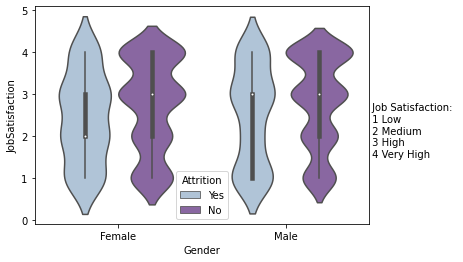

In [57]:
violin_plot("Gender","JobSatisfaction","Attrition" )
plt.annotate(" Job Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

Both male and female employees that stayed had higher levels of job satisfaction. Male employees that left had mostly low or high job satisfaction, while most females who left had medium or high job satisfaction.

### Environment Satisfaction

Text(1.5, 1.5, ' Environment Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

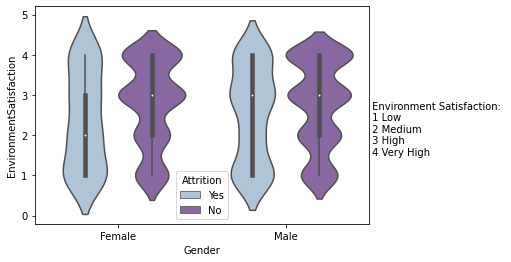

In [59]:
violin_plot("Gender", "EnvironmentSatisfaction", "Attrition")
plt.annotate(" Environment Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

We see that males who left their job had either low or high / very high environment satisfaction levels, while more females who left had low or medium environment satisfaction.

### Relationship Satisfaction

Text(1.5, 1.5, ' Relationship Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

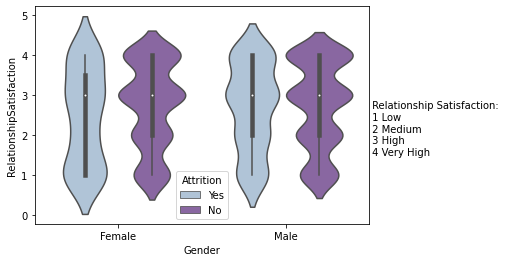

In [60]:
violin_plot("Gender","RelationshipSatisfaction","Attrition")
plt.annotate(" Relationship Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

We see that most of male employees who left the company had higher relationship satisfaction, while a lot of females who left their job had lower relationship satisfaction and some had higher relationship satisfaction.

### Percent Salary Hike

In [73]:
get_counts(['PercentSalaryHike','Gender','Attrition'])

0        16
1        11
2        10
3        75
4        93
       ... 
1465     46
1466     54
1467     23
1468    107
1469     93
Name: Count_PercentSalaryHike_by_GenderAttrition, Length: 1470, dtype: int64

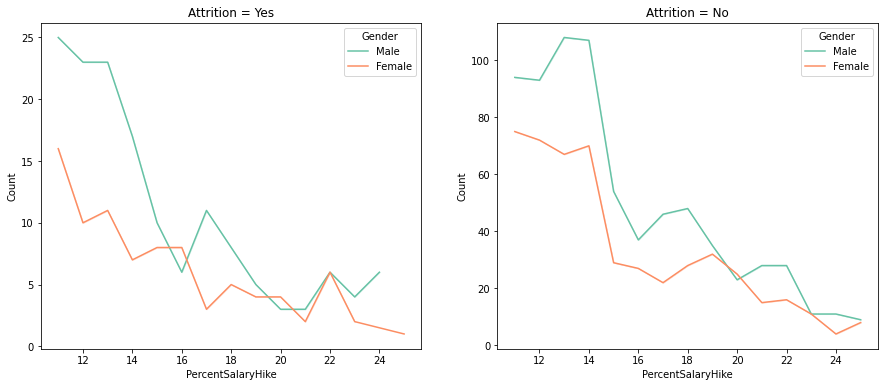

In [76]:
line_plots('PercentSalaryHike', 'Count_PercentSalaryHike_by_GenderAttrition', hue = 'Gender')

We see that males and females have similar trends for both those who left and stayed in the company. Out of those who left higher number of people had lower percent salary hike. 

### Marital Status

In [77]:
get_counts(['MaritalStatus','Gender','Attrition'])

0        47
1       348
2        73
3       241
4       348
       ... 
1465    348
1466    348
1467    348
1468    348
1469    348
Name: Count_MaritalStatus_by_GenderAttrition, Length: 1470, dtype: int64

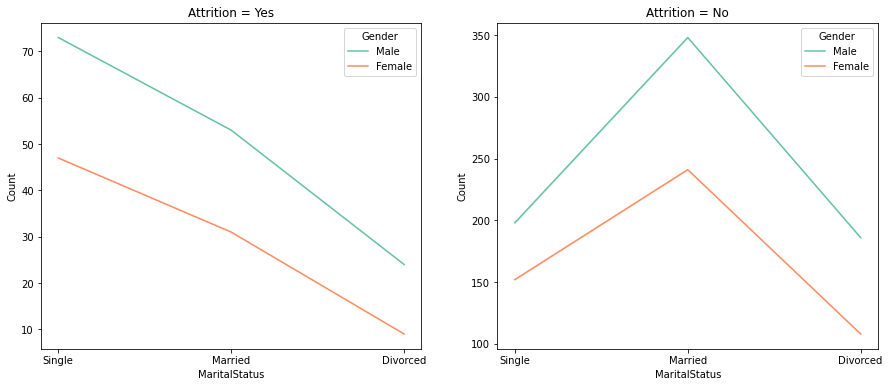

In [81]:
line_plots('MaritalStatus', 'Count_MaritalStatus_by_GenderAttrition', hue = 'Gender')

From the graphs, single people are more likely to quit their job than married ones. Since the graphs are almost parallel, the trend is independent of gender. 

### Work Life Balance

Text(1.5, 1.5, ' Work Life Balance: \n 1 Bad\n 2 Good\n 3 Better \n 4 Best')

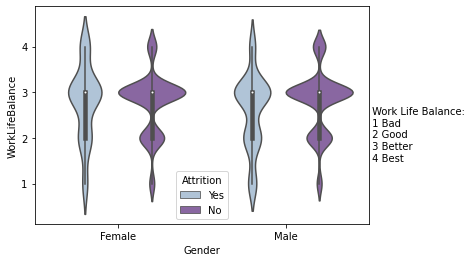

In [80]:
violin_plot("Gender","WorkLifeBalance", "Attrition")
plt.annotate(" Work Life Balance: \n 1 Bad\n 2 Good\n 3 Better \n 4 Best", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

We see that most employees that left or stayed had 'better' work-life balance, both male and female.

### Years At Company

In [82]:
get_counts(['YearsAtCompany','Gender','Attrition'])

0        3
1       72
2       12
3       33
4       66
        ..
1465    97
1466    48
1467    41
1468    42
1469    61
Name: Count_YearsAtCompany_by_GenderAttrition, Length: 1470, dtype: int64

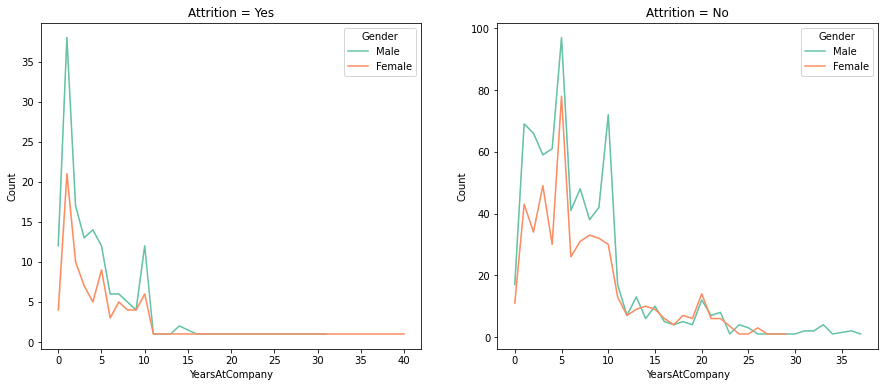

In [83]:
line_plots('YearsAtCompany', 'Count_YearsAtCompany_by_GenderAttrition', hue = 'Gender')

The highest number of employees that quit their job was at 1st year of job, and higher numbers are between 1 and 5 years for both male and female employees. 

### Years Since Last Promotion

In [84]:
get_counts(['YearsSinceLastPromotion','Gender','Attrition'])

0        40
1       187
2        70
3        19
4        84
       ... 
1465    283
1466    187
1467    283
1468    283
1469    187
Name: Count_YearsSinceLastPromotion_by_GenderAttrition, Length: 1470, dtype: int64

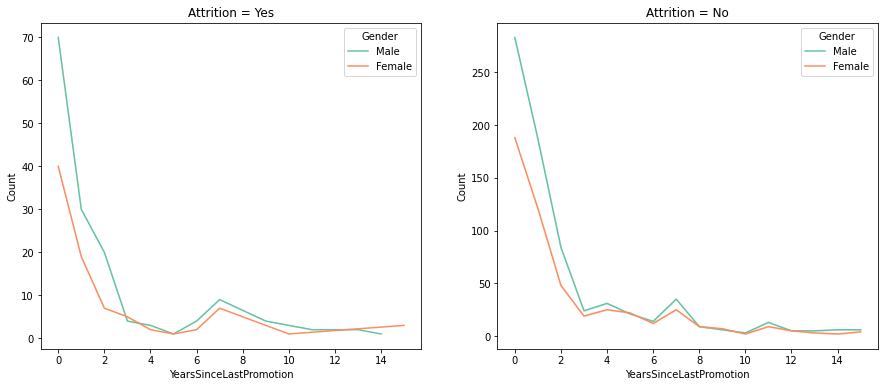

In [85]:
line_plots('YearsSinceLastPromotion', 'Count_YearsSinceLastPromotion_by_GenderAttrition', hue = 'Gender')

Out of the employees that quit their jobs, most were within 2 years since last promotion. 

### Job Level

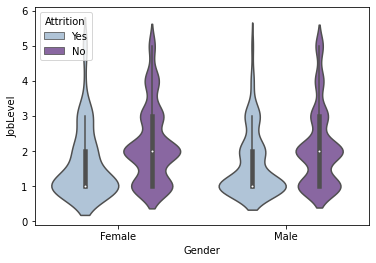

In [86]:
violin_plot("Gender", "JobLevel", "Attrition")

Both male and female employees who quit were more likely to quit at 1st job level. 

### Age

In [87]:
get_counts(['Age','Gender','Attrition'])

0        4
1       11
2        5
3       18
4       25
        ..
1465    35
1466    22
1467    25
1468    11
1469    39
Name: Count_Age_by_GenderAttrition, Length: 1470, dtype: int64

In [166]:
df[(df['Gender'] == 'Male') & (df['Age'] == 50) & (df['Attrition'] == 'Yes')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count_percentsalaryhike_by_gender,Count_martialstatus_by_gender,Count_martialstatus_by_attrition_gender,Count_YearsAtCompany_by_gender,Count_YearsAtCompany_by_attrition_gender,Count_YearsSinceLastPromotion_by_attrition_gender,Count_Age_by_attrition_gender,age_group,hourly_rate_group,years_currentrole_group,years_atcompany_group,distance_from_home_group,Count_HourlyRate_by_attrition_gender,Count_DistanceFromHome_by_attrition_gender,Count_OverTime_by_attrition_gender,Count_PercentSalaryHike_by_GenderAttrition,Count_MaritalStatus_by_GenderAttrition,Count_YearsAtCompany_by_GenderAttrition,Count_YearsSinceLastPromotion_by_GenderAttrition,Count_Age_by_GenderAttrition,Count_OverTime_by_GenderAttrition,Count_HourlyRate_by_GenderAttrition,Count_YearsAtCompany_by_EducationFieldAttrition,Count_YearsInCurrentRole_by_EducationFieldAttrition,Count_YearsSinceLastPromotion_by_EducationFieldAttrition,Count_YearsWithCurrManager_by_EducationFieldAttrition,Count_DailyRate_by_EducationFieldAttrition
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Yes,14,3,3,0,3,2,3,3,2,0,2,124,401,53,72,13,70,5,40-50,over 70,under 3,under 5,under 5,4,8,80,17,53,13,70,5,80,4,3,21,15,17,1
528,50,Yes,Travel_Frequently,562,Sales,8,2,Technical Degree,2,Male,50,3,2,Sales Executive,3,Married,6796,23452,3,Yes,14,3,1,1,18,4,3,4,3,1,3,124,401,53,75,14,30,5,40-50,30-50,under 3,under 5,5-10,5,7,80,17,53,14,30,5,80,5,3,5,10,0,0
801,50,Yes,Travel_Frequently,959,Sales,1,4,Other,4,Male,81,3,2,Sales Executive,3,Single,4728,17251,3,Yes,14,3,4,0,5,4,3,0,0,0,0,124,271,73,29,12,70,5,40-50,over 70,NaN,NaN,under 5,3,16,80,17,73,12,70,5,80,3,2,5,7,5,0
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,94,3,2,Sales Executive,3,Divorced,6728,14255,7,No,12,3,4,2,12,3,3,6,3,0,1,116,210,24,47,6,70,5,40-50,over 70,under 3,5-10,under 5,2,16,70,23,24,6,70,5,70,2,4,9,43,6,0
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Yes,13,3,2,1,20,3,3,3,2,2,0,131,210,24,72,13,20,5,40-50,30-50,under 3,under 5,over20,2,2,80,23,24,13,20,5,80,2,3,21,18,11,0


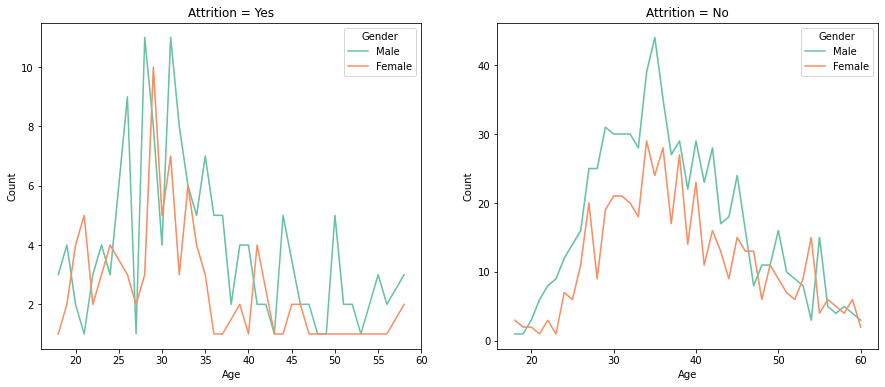

In [88]:
line_plots('Age', 'Count_Age_by_GenderAttrition', hue = 'Gender')

The attrition is highest among 25 to 35 y.o. males and 27 to 35 y.o. females. Also, males aged 43 to 60 are more likely to quit their job than females. 

### Hourly Rate 

In [91]:
get_counts(['HourlyRate','Gender','Attrition'])

0        3
1       13
2        2
3        8
4       10
        ..
1465    12
1466    16
1467    19
1468     6
1469     9
Name: Count_HourlyRate_by_GenderAttrition, Length: 1470, dtype: int64

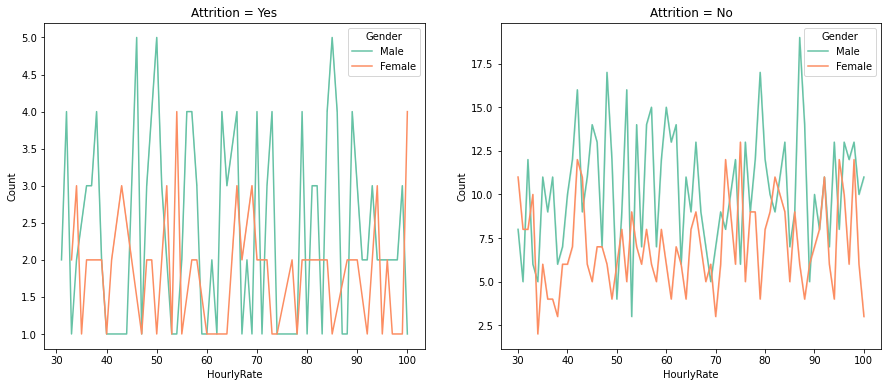

In [92]:
line_plots('HourlyRate', 'Count_HourlyRate_by_GenderAttrition', hue = 'Gender')

We see from the plots that there isn't great discrepancy between hourly rate for males and females and attrition happens at different hourly rates, there isn't a clear trend. 

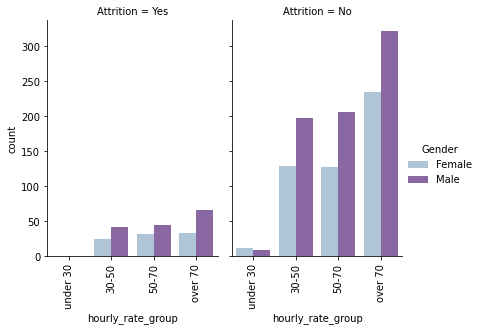

In [43]:
plot_cat_vars("hourly_rate_group",df,"Gender")

### Overtime

In [89]:
get_counts(['OverTime','Gender','Attrition'])

0        47
1       576
2        80
3       133
4       576
       ... 
1465    576
1466    576
1467    156
1468    576
1469    576
Name: Count_OverTime_by_GenderAttrition, Length: 1470, dtype: int64

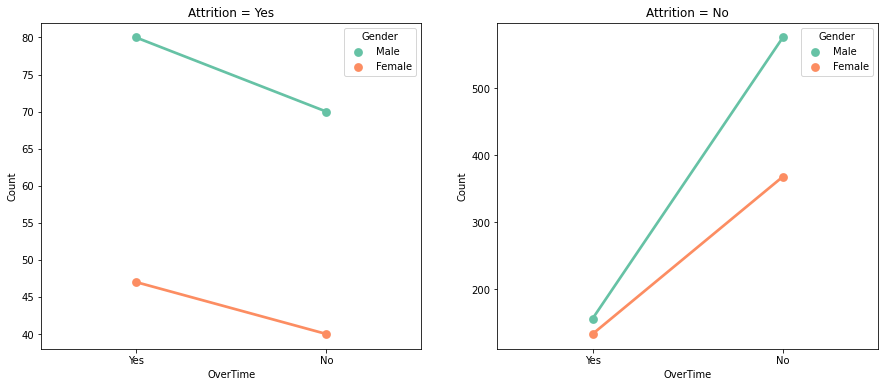

In [96]:
point_plots('OverTime', 'Count_OverTime_by_GenderAttrition', hue = 'Gender')

We see that for those employees that left, overtime is independent of gender, and more employees that left did overtime, than thos who stayed in the company. 

## EDA 2: Education Field Differences

Education + (not good insight)
Department + (same)
**EducationField**
TrainingTimesLastYear + (same)
YearsAtCompany + 
YearsInCurrentRole +
YearsSinceLastPromotion +
YearsWithCurrManager + 
**Attrition**
DailyRate
MonthlyIncome
StockOptionLevel
BusinessTravel
JobRole

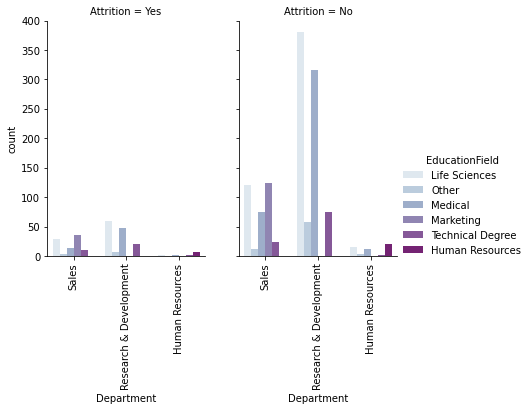

In [101]:
plot_cat_vars('Department', df, 'EducationField')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

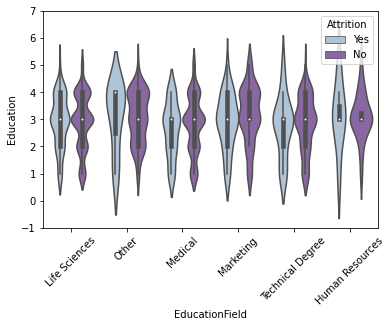

In [109]:
# g = sns.violinplot(x='EducationField', y='Education', hue='Attrition',
#                  data=df)
violin_plot('EducationField', 'Education', 'Attrition')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

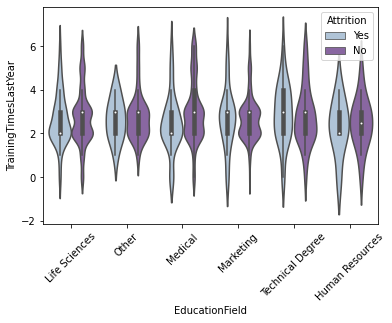

In [110]:
#TrainingTimesLastYear
violin_plot('EducationField', 'TrainingTimesLastYear', 'Attrition')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

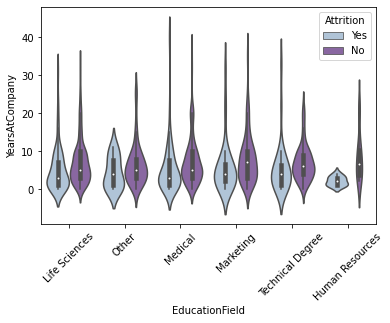

In [111]:
violin_plot('EducationField', 'YearsAtCompany', 'Attrition')
plt.xticks(rotation=45)

### Years At Company

In [112]:
get_counts(['YearsAtCompany','EducationField','Attrition'])

0        4
1       47
2        2
3       27
4       31
        ..
1465    66
1466    23
1467    24
1468    23
1469    33
Name: Count_YearsAtCompany_by_EducationFieldAttrition, Length: 1470, dtype: int64

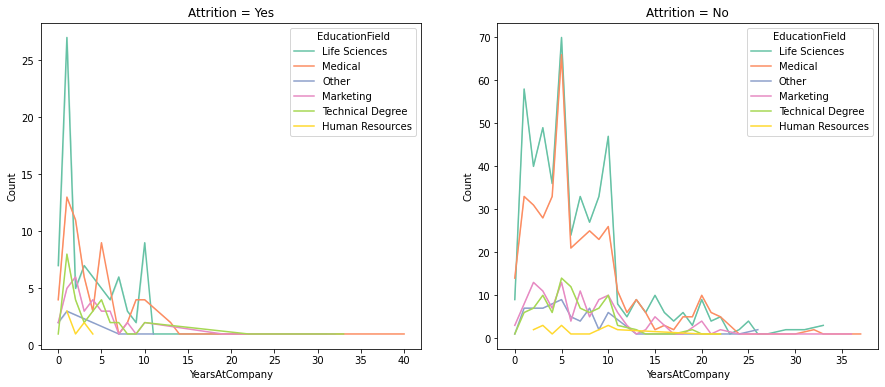

In [122]:
line_plots('YearsAtCompany', 'Count_YearsAtCompany_by_EducationFieldAttrition', 'EducationField')

We see that out of employees that quit, those in HR quit after staying under 4 years in the company. Most employees of Life Sciences quit in the 1st year, and Medical fields quit in the first couple of years. 

### Years In Current Role

In [123]:
get_counts(['YearsInCurrentRole','EducationField','Attrition'])

0       4
1       3
2       5
3       3
4       1
       ..
1465    1
1466    1
1467    6
1468    0
1469    5
Name: Count_YearsInCurrentRole_by_EducationFieldAttrition, Length: 1470, dtype: int64

In [165]:
df[(df['EducationField'] == 'Other') & (df['YearsInCurrentRole'] == 2) & (df['Attrition'] == 'No')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count_percentsalaryhike_by_gender,Count_martialstatus_by_gender,Count_martialstatus_by_attrition_gender,Count_YearsAtCompany_by_gender,Count_YearsAtCompany_by_attrition_gender,Count_YearsSinceLastPromotion_by_attrition_gender,Count_Age_by_attrition_gender,age_group,hourly_rate_group,years_currentrole_group,years_atcompany_group,distance_from_home_group,Count_HourlyRate_by_attrition_gender,Count_DistanceFromHome_by_attrition_gender,Count_OverTime_by_attrition_gender,Count_PercentSalaryHike_by_GenderAttrition,Count_MaritalStatus_by_GenderAttrition,Count_YearsAtCompany_by_GenderAttrition,Count_YearsSinceLastPromotion_by_GenderAttrition,Count_Age_by_GenderAttrition,Count_OverTime_by_GenderAttrition,Count_HourlyRate_by_GenderAttrition,Count_YearsAtCompany_by_EducationFieldAttrition,Count_YearsInCurrentRole_by_EducationFieldAttrition,Count_YearsSinceLastPromotion_by_EducationFieldAttrition,Count_YearsWithCurrManager_by_EducationFieldAttrition,Count_DailyRate_by_EducationFieldAttrition
20,24,No,Non-Travel,673,Research & Development,11,2,Other,1,Female,96,4,2,Manufacturing Director,3,Divorced,4011,8232,0,No,18,3,4,1,5,5,2,4,2,1,3,33,117,108,35,30,121,7,20-30,over 70,under 3,under 5,10-15,10,14,368,28,108,30,121,7,368,10,8,117,14,8,0
31,44,No,Travel_Rarely,1459,Research & Development,10,4,Other,4,Male,41,3,2,Healthcare Representative,4,Married,6465,19121,2,Yes,13,3,4,0,9,5,4,4,2,1,3,131,401,348,75,61,187,18,40-50,30-50,under 3,under 5,5-10,12,45,156,108,348,61,187,18,156,12,8,117,14,8,0
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,Female,33,3,2,Sales Executive,3,Married,4999,17519,0,No,21,4,1,1,4,2,2,3,2,0,2,17,272,241,56,49,188,7,20-30,30-50,under 3,under 5,under 5,10,30,368,15,241,49,188,7,368,10,7,117,35,13,0
337,29,No,Travel_Rarely,738,Research & Development,9,5,Other,2,Male,30,2,1,Laboratory Technician,4,Single,3983,7621,0,No,17,3,3,0,4,2,3,3,2,2,2,57,271,198,72,59,84,31,20-30,under 30,under 3,under 5,5-10,8,51,576,46,198,59,84,31,576,8,7,117,7,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,38,No,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Yes,11,3,2,1,7,2,3,6,2,1,2,119,401,348,47,41,187,29,30-40,over 70,under 3,5-10,under 5,14,106,156,94,348,41,187,29,156,14,5,117,14,13,0
1408,23,No,Travel_Rarely,571,Research & Development,12,2,Other,4,Male,78,3,1,Laboratory Technician,4,Single,2647,13672,1,No,13,3,3,0,5,6,4,5,2,1,4,131,271,198,109,97,187,9,20-30,over 70,under 3,under 5,10-15,12,7,576,108,198,97,187,9,576,12,9,117,14,1,0
1413,25,No,Travel_Rarely,977,Research & Development,2,1,Other,4,Male,57,3,1,Laboratory Technician,3,Divorced,3977,7298,6,Yes,19,3,3,1,7,2,2,2,2,0,2,40,210,186,83,66,283,14,20-30,50-70,under 3,under 5,under 5,15,105,156,35,186,66,283,14,156,15,7,117,35,13,0
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,No,18,3,4,0,5,2,3,4,2,0,0,33,199,152,35,30,188,11,20-30,under 30,under 3,under 5,under 5,11,18,368,28,152,30,188,11,368,11,8,117,35,10,0


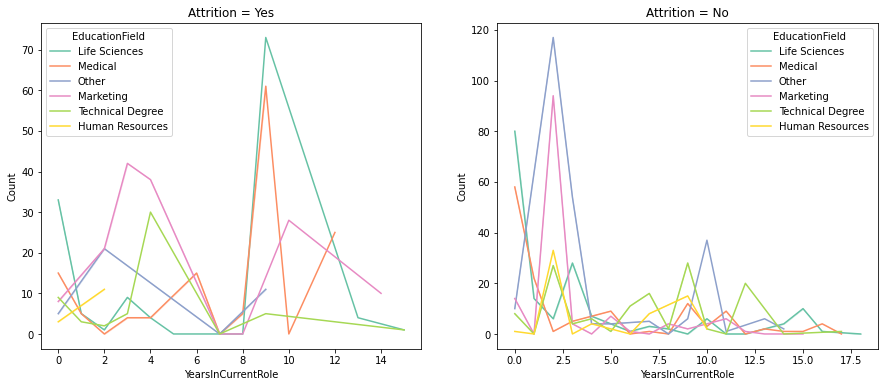

In [124]:
line_plots('YearsInCurrentRole', 'Count_YearsInCurrentRole_by_EducationFieldAttrition', 'EducationField')

For Life Sciences the majority of people left after 9-12 years being in current role. In Medical field, it's between 8 and 10 years. 
In Marketing the highest number of people who left spent between 2 and 5 years in current role or 9 to 11 years. 
Those with Technical Degree who left the company did so after being between 4 and 6 years in current role.

TO DO: put these numbers in the table. 

### Years Since Last Promotion

In [125]:
get_counts(['YearsSinceLastPromotion','EducationField','Attrition'])

0        43
1       131
2         7
3         1
4        42
       ... 
1465    148
1466    101
1467    205
1468    148
1469    101
Name: Count_YearsSinceLastPromotion_by_EducationFieldAttrition, Length: 1470, dtype: int64

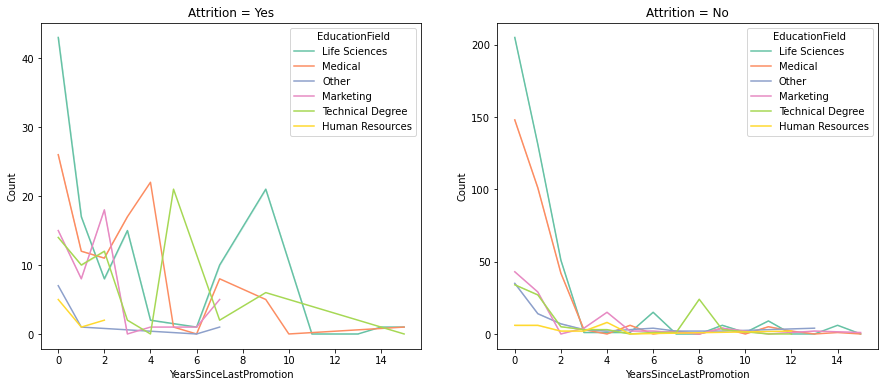

In [126]:
line_plots('YearsSinceLastPromotion', 'Count_YearsSinceLastPromotion_by_EducationFieldAttrition', 'EducationField')

Summarize in a table

### Years With Current Manager

In [127]:
get_counts(['YearsWithCurrManager','EducationField','Attrition'])

0        0
1        0
2        5
3       82
4        0
        ..
1465     3
1466     0
1467     6
1468     1
1469     0
Name: Count_YearsWithCurrManager_by_EducationFieldAttrition, Length: 1470, dtype: int64

In [143]:
dd = df.groupby(['YearsWithCurrManager','EducationField','Attrition'])

In [156]:
df[df['EducationField'] == 'Medical']
pd.set_option("display.max_rows", 8)


In [158]:
df[(df['EducationField'] == 'Medical') & (df['YearsWithCurrManager'] == 2) & (df['Attrition'] == 'Yes')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count_percentsalaryhike_by_gender,Count_martialstatus_by_gender,Count_martialstatus_by_attrition_gender,Count_YearsAtCompany_by_gender,Count_YearsAtCompany_by_attrition_gender,Count_YearsSinceLastPromotion_by_attrition_gender,Count_Age_by_attrition_gender,age_group,hourly_rate_group,years_currentrole_group,years_atcompany_group,distance_from_home_group,Count_HourlyRate_by_attrition_gender,Count_DistanceFromHome_by_attrition_gender,Count_OverTime_by_attrition_gender,Count_PercentSalaryHike_by_GenderAttrition,Count_MaritalStatus_by_GenderAttrition,Count_YearsAtCompany_by_GenderAttrition,Count_YearsSinceLastPromotion_by_GenderAttrition,Count_Age_by_GenderAttrition,Count_OverTime_by_GenderAttrition,Count_HourlyRate_by_GenderAttrition,Count_YearsAtCompany_by_EducationFieldAttrition,Count_YearsInCurrentRole_by_EducationFieldAttrition,Count_YearsSinceLastPromotion_by_EducationFieldAttrition,Count_YearsWithCurrManager_by_EducationFieldAttrition,Count_DailyRate_by_EducationFieldAttrition
288,26,Yes,Travel_Rarely,1449,Research & Development,16,4,Medical,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373,14180,2,Yes,13,3,4,1,5,2,3,3,2,0,2,131,210,24,72,13,70,9,20-30,30-50,under 3,under 5,15-20,3,3,80,23,24,13,70,9,80,3,6,0,26,125,0
323,28,Yes,Travel_Rarely,1157,Research & Development,2,4,Medical,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Yes,13,3,4,0,5,4,2,3,2,2,2,131,401,53,72,13,20,11,20-30,over 70,under 3,under 5,under 5,4,19,80,23,53,13,20,11,80,4,6,0,11,125,0
405,25,Yes,Travel_Rarely,688,Research & Development,3,3,Medical,1,Male,91,3,1,Laboratory Technician,1,Married,4031,9396,5,No,13,3,3,1,6,5,3,2,2,0,2,131,401,53,83,17,70,6,20-30,over 70,under 3,under 5,under 5,2,8,70,23,53,17,70,6,70,2,11,0,26,125,0
482,31,Yes,Travel_Rarely,1365,Sales,13,4,Medical,2,Male,46,3,2,Sales Executive,1,Divorced,4233,11512,2,No,17,3,3,0,9,2,1,3,1,1,2,57,210,24,72,13,30,11,30-40,30-50,under 3,under 5,10-15,5,4,70,11,24,13,30,11,70,5,6,5,12,125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,31,Yes,Travel_Frequently,874,Research & Development,15,3,Medical,3,Male,72,3,1,Laboratory Technician,3,Married,2610,6233,1,No,12,3,3,1,2,5,2,2,2,2,2,116,401,53,83,17,20,11,30-40,over 70,under 3,under 5,10-15,3,4,70,23,53,17,20,11,70,3,11,0,11,125,2
1167,35,Yes,Travel_Rarely,763,Sales,15,2,Medical,1,Male,59,1,2,Sales Executive,4,Divorced,5440,22098,6,Yes,14,3,4,2,7,2,2,2,2,2,2,124,210,24,83,17,20,7,30-40,50-70,under 3,under 5,10-15,1,4,80,17,24,17,20,7,80,1,11,0,11,125,1
1201,23,Yes,Travel_Rarely,1320,Research & Development,8,1,Medical,4,Male,93,2,1,Laboratory Technician,3,Single,3989,20586,1,Yes,11,3,1,0,5,2,3,5,4,1,2,119,271,73,109,12,30,4,20-30,over 70,3-5,under 5,5-10,3,7,80,25,73,12,30,4,80,3,9,4,12,125,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Yes,14,3,2,3,4,3,4,2,2,2,2,124,401,53,83,17,20,8,20-30,30-50,under 3,under 5,under 5,3,16,80,17,53,17,20,8,80,3,11,0,11,125,0


# Fix count function, it is wrong.

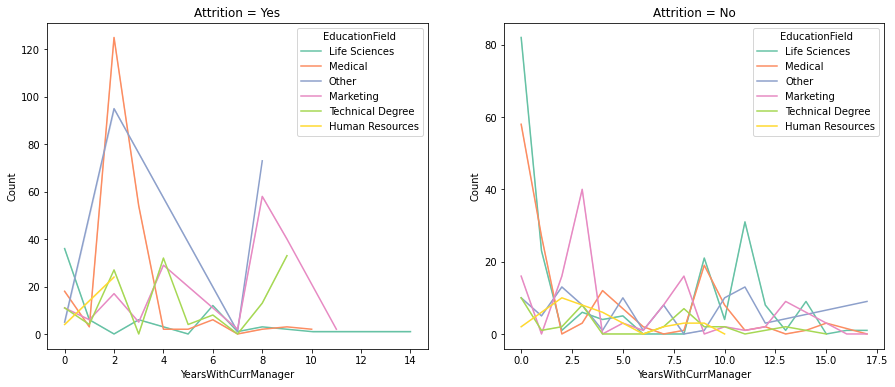

In [128]:
line_plots('YearsWithCurrManager', 'Count_YearsWithCurrManager_by_EducationFieldAttrition', 'EducationField')

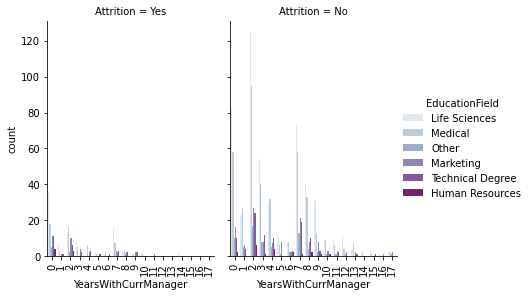

In [149]:
plot_cat_vars('YearsWithCurrManager', df, 'EducationField')

Summarize in the table

### Daily Rate

In [131]:
get_counts(['DailyRate','EducationField','Attrition'])

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Count_DailyRate_by_EducationFieldAttrition, Length: 1470, dtype: int64

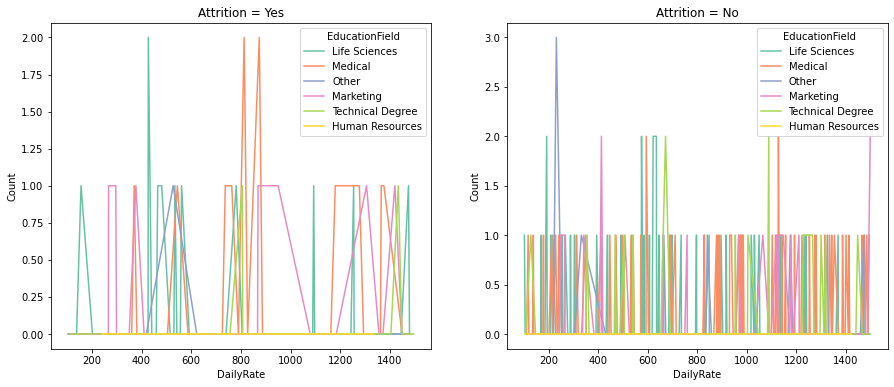

In [140]:
line_plots('DailyRate', 'Count_DailyRate_by_EducationFieldAttrition', 'EducationField')

In [134]:
df[(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Life Sciences')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count_percentsalaryhike_by_gender,Count_martialstatus_by_gender,Count_martialstatus_by_attrition_gender,Count_YearsAtCompany_by_gender,Count_YearsAtCompany_by_attrition_gender,Count_YearsSinceLastPromotion_by_attrition_gender,Count_Age_by_attrition_gender,age_group,hourly_rate_group,years_currentrole_group,years_atcompany_group,distance_from_home_group,Count_HourlyRate_by_attrition_gender,Count_DistanceFromHome_by_attrition_gender,Count_OverTime_by_attrition_gender,Count_PercentSalaryHike_by_GenderAttrition,Count_MaritalStatus_by_GenderAttrition,Count_YearsAtCompany_by_GenderAttrition,Count_YearsSinceLastPromotion_by_GenderAttrition,Count_Age_by_GenderAttrition,Count_OverTime_by_GenderAttrition,Count_HourlyRate_by_GenderAttrition,Count_YearsAtCompany_by_EducationFieldAttrition,Count_YearsInCurrentRole_by_EducationFieldAttrition,Count_YearsSinceLastPromotion_by_EducationFieldAttrition,Count_YearsWithCurrManager_by_EducationFieldAttrition,Count_DailyRate_by_EducationFieldAttrition
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,91,199,47,29,3,40,4,40-50,over 70,3-5,5-10,under 5,3,10,47,16,47,3,40,4,47,3,4,4,43,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Yes,14,3,2,0,6,4,3,4,2,0,3,124,271,73,75,14,70,11,20-30,30-50,under 3,under 5,over20,5,10,80,17,73,14,70,11,80,5,6,1,43,6,0
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3,15,271,73,109,12,70,5,30-40,over 70,under 3,under 5,5-10,3,12,70,4,73,12,70,5,70,3,5,9,43,6,0
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Yes,22,4,2,0,10,5,3,10,2,6,7,22,199,47,36,6,2,3,30-40,over 70,under 3,5-10,15-20,2,4,47,6,47,6,2,3,47,2,9,1,1,1,0
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,No,12,3,3,0,1,2,2,1,0,0,1,116,271,73,107,38,70,9,20-30,30-50,NaN,under 5,over20,3,4,70,23,73,38,70,9,70,3,27,33,43,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,22,Yes,Travel_Rarely,391,Research & Development,7,1,Life Sciences,4,Male,75,3,1,Research Scientist,2,Single,2472,26092,1,Yes,23,4,1,0,1,2,3,1,0,0,0,15,271,73,107,38,70,3,20-30,over 70,NaN,under 5,5-10,1,7,80,4,73,38,70,3,80,1,27,33,43,36,0
1354,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,Male,97,3,1,Laboratory Technician,4,Single,2587,10261,1,No,16,3,4,0,5,3,3,4,2,1,0,43,271,73,75,14,30,2,50-60,over 70,under 3,under 5,over20,2,10,70,6,73,14,30,2,70,2,6,1,17,36,0
1375,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,Female,47,4,1,Research Scientist,3,Single,2432,15318,3,Yes,14,3,1,0,8,2,3,4,1,0,3,77,199,47,35,5,40,3,30-40,30-50,under 3,under 5,under 5,1,4,47,7,47,5,40,3,47,1,6,5,43,6,0
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,Male,66,3,3,Sales Executive,1,Single,10448,5843,6,Yes,13,3,2,0,15,2,2,2,2,2,2,131,271,73,83,17,20,1,50-60,50-70,under 3,under 5,over20,4,10,80,23,73,17,20,1,80,4,5,1,8,0,0


In [135]:
df1 = df.head(15)

In [139]:
df2 = df1[df1['Attrition'] == 'No']
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count_percentsalaryhike_by_gender,Count_martialstatus_by_gender,Count_martialstatus_by_attrition_gender,Count_YearsAtCompany_by_gender,Count_YearsAtCompany_by_attrition_gender,Count_YearsSinceLastPromotion_by_attrition_gender,Count_Age_by_attrition_gender,age_group,hourly_rate_group,years_currentrole_group,years_atcompany_group,distance_from_home_group,Count_HourlyRate_by_attrition_gender,Count_DistanceFromHome_by_attrition_gender,Count_OverTime_by_attrition_gender,Count_PercentSalaryHike_by_GenderAttrition,Count_MaritalStatus_by_GenderAttrition,Count_YearsAtCompany_by_GenderAttrition,Count_YearsSinceLastPromotion_by_GenderAttrition,Count_Age_by_GenderAttrition,Count_OverTime_by_GenderAttrition,Count_HourlyRate_by_GenderAttrition,Count_YearsAtCompany_by_EducationFieldAttrition,Count_YearsInCurrentRole_by_EducationFieldAttrition,Count_YearsSinceLastPromotion_by_EducationFieldAttrition,Count_YearsWithCurrManager_by_EducationFieldAttrition,Count_DailyRate_by_EducationFieldAttrition
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,15,401,348,84,72,187,11,40-50,50-70,5-10,5-10,5-10,13,36,576,11,348,72,187,11,576,13,47,3,131,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,91,272,241,37,33,19,18,30-40,50-70,5-10,5-10,under 5,8,30,133,75,241,33,19,18,133,8,27,3,1,82,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,116,401,348,83,66,84,25,20-30,30-50,under 3,under 5,under 5,10,105,576,93,348,66,84,25,576,10,31,1,42,0,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,131,271,198,54,48,24,30,30-40,over 70,5-10,5-10,under 5,17,105,576,108,198,48,24,30,576,17,33,3,1,0,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,29,272,241,64,43,188,6,50-60,over 70,NaN,under 5,under 5,9,30,133,25,241,43,188,6,133,9,33,58,148,58,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,34,210,186,107,69,283,30,20-30,50-70,NaN,under 5,over20,9,12,576,28,186,69,283,30,576,9,58,80,205,82,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,31,271,198,46,42,187,29,30-40,30-50,5-10,5-10,over20,11,16,576,28,198,42,187,29,576,11,33,3,131,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,131,401,348,54,48,35,35,30-40,over 70,5-10,5-10,over20,13,4,576,108,348,48,35,35,576,13,23,1,2,0,0
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,Male,84,4,1,Laboratory Technician,2,Married,2426,16479,0,No,13,3,3,1,6,5,3,5,4,0,3,131,401,348,109,97,283,44,30-40,over 70,3-5,under 5,15-20,13,14,576,108,348,97,283,44,576,13,66,7,148,3,0
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Yes,12,3,4,0,10,3,3,9,5,0,8,82,199,152,36,32,188,19,20-30,30-50,3-5,5-10,10-15,4,9,133,72,152,32,188,19,133,4,33,4,205,0,0


In [147]:
df2['count_trial'] = df2.groupby(['YearsWithCurrManager', 'EducationField'])['YearsWithCurrManager'].transform('count')

<ipython-input-147-f695c8b0661a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['count_trial'] = df2.groupby(['YearsWithCurrManager', 'EducationField'])['YearsWithCurrManager'].transform('count')


In [148]:
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Count_percentsalaryhike_by_gender,Count_martialstatus_by_gender,Count_martialstatus_by_attrition_gender,Count_YearsAtCompany_by_gender,Count_YearsAtCompany_by_attrition_gender,Count_YearsSinceLastPromotion_by_attrition_gender,Count_Age_by_attrition_gender,age_group,hourly_rate_group,years_currentrole_group,years_atcompany_group,distance_from_home_group,Count_HourlyRate_by_attrition_gender,Count_DistanceFromHome_by_attrition_gender,Count_OverTime_by_attrition_gender,Count_PercentSalaryHike_by_GenderAttrition,Count_MaritalStatus_by_GenderAttrition,Count_YearsAtCompany_by_GenderAttrition,Count_YearsSinceLastPromotion_by_GenderAttrition,Count_Age_by_GenderAttrition,Count_OverTime_by_GenderAttrition,Count_HourlyRate_by_GenderAttrition,Count_YearsAtCompany_by_EducationFieldAttrition,Count_YearsInCurrentRole_by_EducationFieldAttrition,Count_YearsSinceLastPromotion_by_EducationFieldAttrition,Count_YearsWithCurrManager_by_EducationFieldAttrition,Count_DailyRate_by_EducationFieldAttrition,count_trial
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,15,401,348,84,72,187,11,40-50,50-70,5-10,5-10,5-10,13,36,576,11,348,72,187,11,576,13,47,3,131,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,91,272,241,37,33,19,18,30-40,50-70,5-10,5-10,under 5,8,30,133,75,241,33,19,18,133,8,27,3,1,82,0,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,116,401,348,83,66,84,25,20-30,30-50,under 3,under 5,under 5,10,105,576,93,348,66,84,25,576,10,31,1,42,0,0,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,131,271,198,54,48,24,30,30-40,over 70,5-10,5-10,under 5,17,105,576,108,198,48,24,30,576,17,33,3,1,0,0,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,29,272,241,64,43,188,6,50-60,over 70,NaN,under 5,under 5,9,30,133,25,241,43,188,6,133,9,33,58,148,58,0,1
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,34,210,186,107,69,283,30,20-30,50-70,NaN,under 5,over20,9,12,576,28,186,69,283,30,576,9,58,80,205,82,0,2
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,31,271,198,46,42,187,29,30-40,30-50,5-10,5-10,over20,11,16,576,28,198,42,187,29,576,11,33,3,131,0,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,131,401,348,54,48,35,35,30-40,over 70,5-10,5-10,over20,13,4,576,108,348,48,35,35,576,13,23,1,2,0,0,2
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,Male,84,4,1,Laboratory Technician,2,Married,2426,16479,0,No,13,3,3,1,6,5,3,5,4,0,3,131,401,348,109,97,283,44,30-40,over 70,3-5,under 5,15-20,13,14,576,108,348,97,283,44,576,13,66,7,148,3,0,0
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Yes,12,3,4,0,10,3,3,9,5,0,8,82,199,152,36,32,188,19,20-30,30-50,3-5,5-10,10-15,4,9,133,72,152

## EDA 3: Salary Differences

In [ ]:
DailyRate 
JobRole

## EDA 4: Job Level Differences

In [ ]:
JobRole
JobLevel

## EDA 5: Environment Satisfaction Differences

In [98]:
def plot_cat_vars(cat_var, df, cat_var_hue):
    g = sns.catplot(x=cat_var, col="Attrition", hue=cat_var_hue,
                data=df, kind="count",
                height=4, aspect=.7, palette = "BuPu")
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [39]:
df["age_group"] = pd.cut(x=df['Age'], bins=[0,20,30,40,50,60], labels=["under 20","20-30","30-40","40-50","50-60"])
df["hourly_rate_group"] = pd.cut(x=df['HourlyRate'], bins=[0,30,50,70,110], labels=["under 30","30-50","50-70","over 70"])
df["years_currentrole_group"] = pd.cut(x=df['YearsInCurrentRole'], bins=[0,3,5,10,15,20], labels=["under 3","3-5","5-10","10-15","15-20"])
df["years_atcompany_group"] = pd.cut(x=df['YearsAtCompany'], bins=[0,5,10,20,30,40], labels=["under 5","5-10","10-20","20-30","30-40"])
df["distance_from_home_group"] = pd.cut(x=df['DistanceFromHome'], bins=[0,5,10,15,20,30], labels=["under 5","5-10","10-15","15-20","over20"])

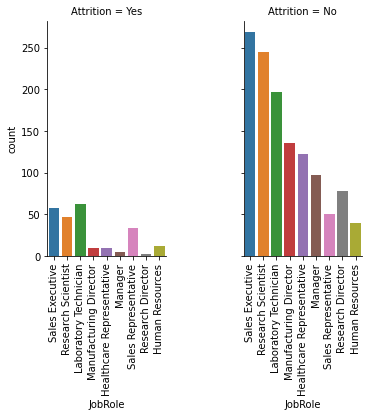

In [17]:
plot_cat_vars("JobRole",df,None)

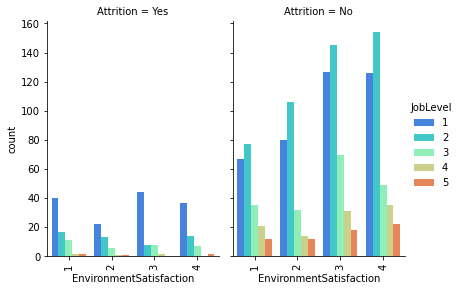

In [150]:
plot_cat_vars("EnvironmentSatisfaction", df, "JobLevel")

Employees are more likely to quit at entry level jobs regardless of their level of satisfaction.

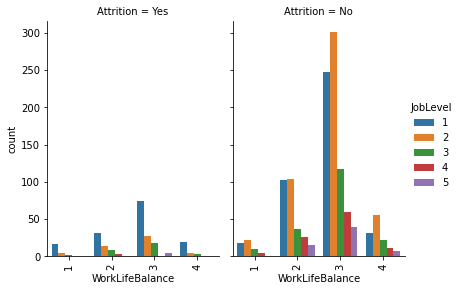

In [21]:
plot_cat_vars("WorkLifeBalance", df, "JobLevel")

Employees are more likely to quit at entry level jobs regardless of their level of work life balance.

Employees who have entry level positions are more likely to leave company, thus should be targeted more. 

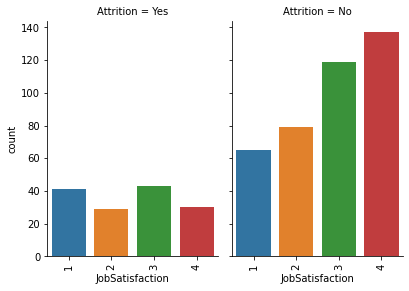

In [25]:
#Analyze the employees at job level 1
plot_cat_vars("JobSatisfaction", df[df["JobLevel"] == 1],None)

The employees at entry job level that stayed in the company had higher job satisfaction.

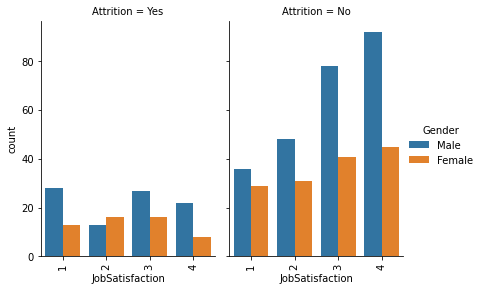

In [26]:
#Analyze the employees at job level 1
plot_cat_vars("JobSatisfaction", df[df["JobLevel"] == 1], "Gender")

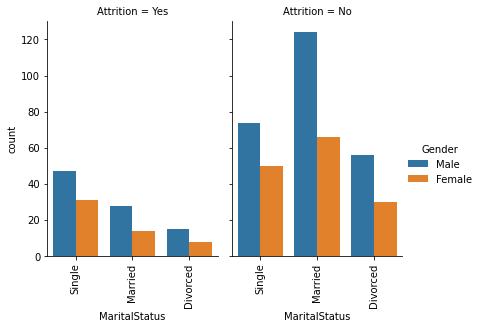

In [27]:
plot_cat_vars("MaritalStatus", df[df["JobLevel"] == 1], "Gender")

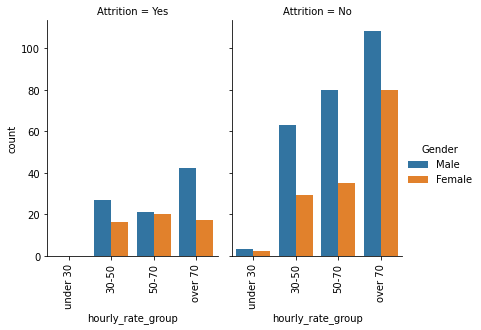

In [31]:
plot_cat_vars("hourly_rate_group", df[df["JobLevel"] == 1], "Gender")

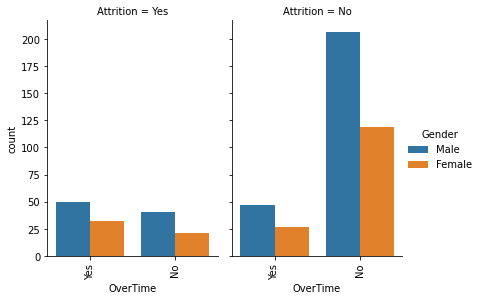

In [32]:
plot_cat_vars("OverTime", df[df["JobLevel"] == 1], "Gender")


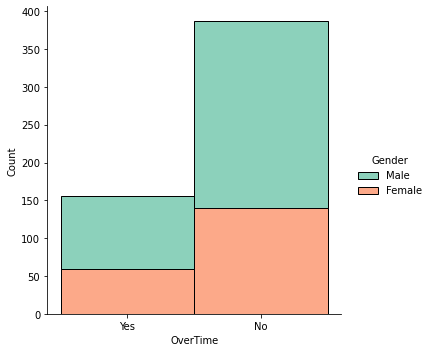

In [33]:
g = sns.displot(data = df[df["JobLevel"] == 1], x= "OverTime", kde=False, palette="Set2", hue = "Gender", multiple = "stack")

Text(0.5, 1.0, 'Attrition = No')

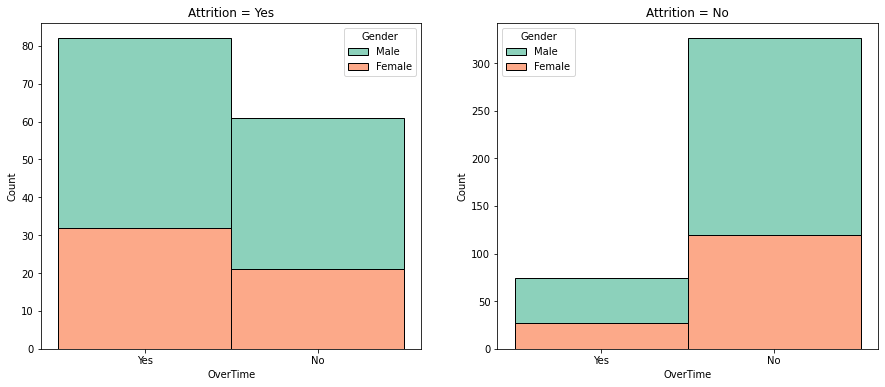

In [38]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
hue_order = ["Male", "Female"]
sns.histplot(data = df[(df["JobLevel"] == 1) & (df["Attrition"] == "Yes")], x= "OverTime", kde=False, palette="Set2", hue = "Gender", hue_order = hue_order, multiple = "stack", ax=ax[0])
sns.histplot(data = df[(df["JobLevel"] == 1) & (df["Attrition"] == "No")], x= "OverTime", kde=False, palette="Set2", hue = "Gender", hue_order = hue_order, multiple = "stack", ax=ax[1])
ax[0].set_title("Attrition = Yes")
ax[1].set_title("Attrition = No")

For entry-level jobs overtime doesn't differ much between those who quit their job

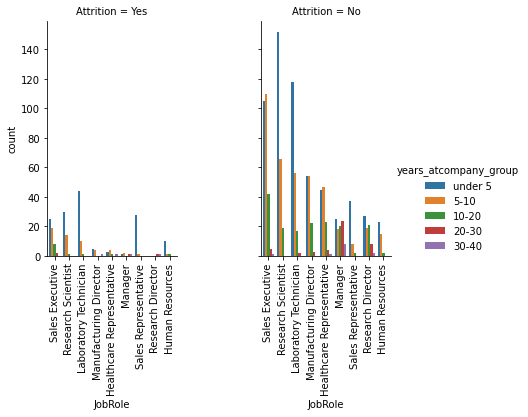

In [35]:
plot_cat_vars("JobRole",df,"years_atcompany_group")

We see that employee attrition is more likely to happen at early stages of career as indicated by blue peaks on the graph on the left. Now let's explore the group under 5 years in more details.

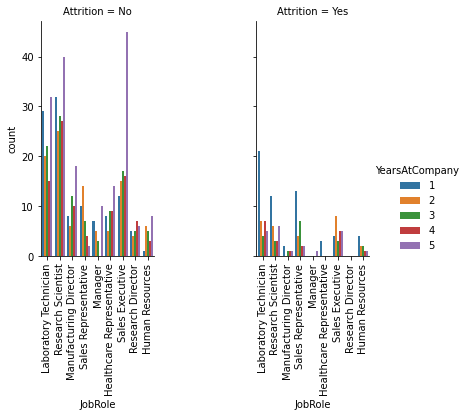

In [37]:
plot_cat_vars("JobRole",df[df["years_atcompany_group"] == 'under 5'],"YearsAtCompany")

The employees who were in the company only for a year are more likely to quit than those who spent more than 3 year in the company.
Sales executives were more likely to stay in the company if worked for 5 years.

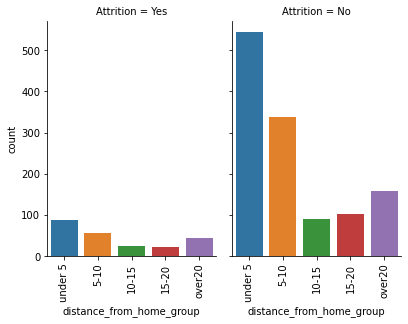

In [41]:
plot_cat_vars("distance_from_home_group",df, None)

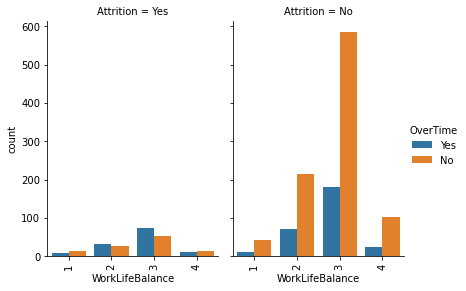

In [41]:
plot_cat_vars("WorkLifeBalance",df,"OverTime")

Those who do more overtime are more likely to quit even if they have good work life balance.
People who have good work-life balance do a lot less overtime. 
Among those who didn't quit their job, the majority did not do overtime regardless of work-life balance.

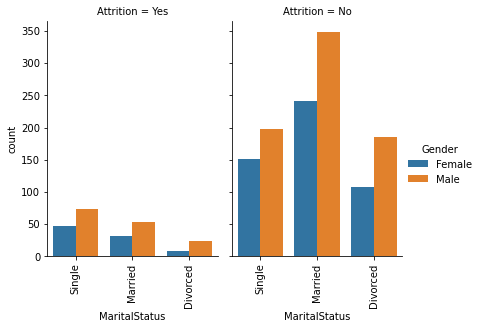

In [42]:
plot_cat_vars("MaritalStatus",df,"Gender")

Single people are more likely to quit then married or divorced, for both male and female (left graph). Married are morelikely to stay (from graph on the right)

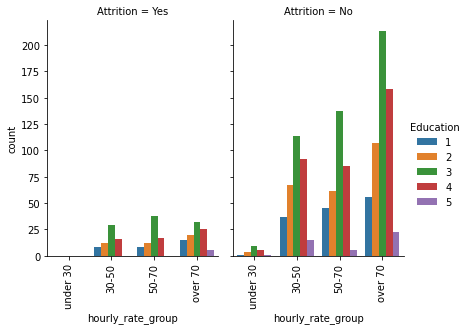

In [45]:
plot_cat_vars("hourly_rate_group",df,"Education")

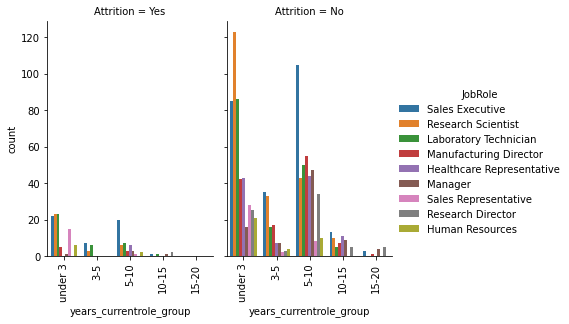

In [51]:
# JobRole YearsInCurrentRole vs Attrition

plot_cat_vars("years_currentrole_group",df,"JobRole")

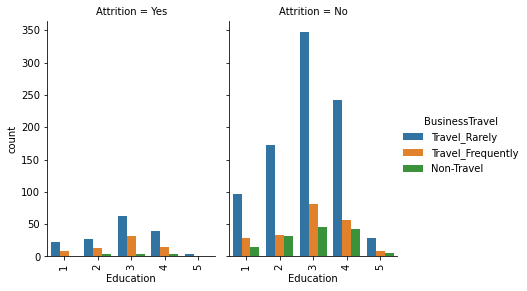

In [55]:
# BusinessTravel Department vs Attrition

plot_cat_vars("Education",df,"BusinessTravel")


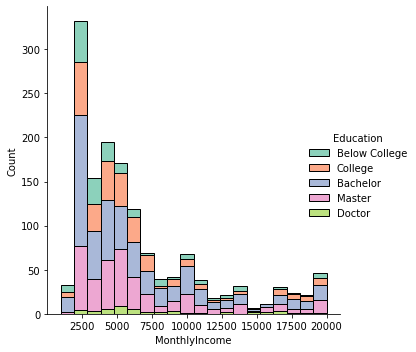

In [90]:
g = sns.displot(data = df, x= "MonthlyIncome", kde=False, palette="Set2", hue = "Education", multiple = "stack")
new_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [71]:
df_high_income = df[df["MonthlyIncome"] > 10000]

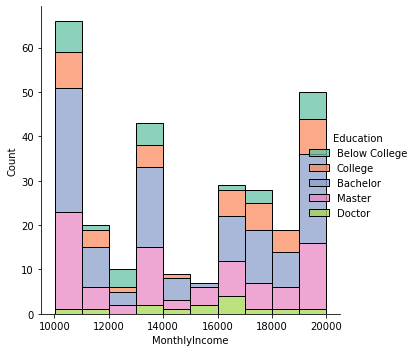

In [89]:
g = sns.displot(data = df_high_income, x= "MonthlyIncome", kde=False, palette="Set2", hue = "Education", multiple = "stack", legend = True)
new_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [114]:
numerical_vars = ['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                  'TotalWorkingYears','MonthlyIncome']

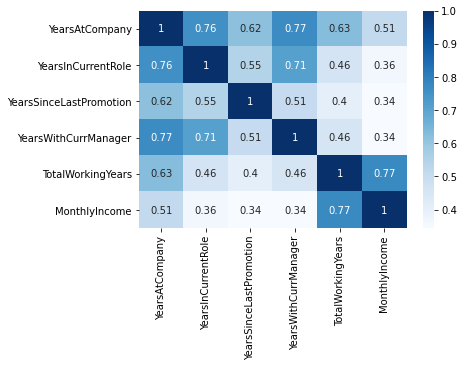

In [96]:
sns.heatmap(df[numerical_vars].corr(), cmap='Blues', annot=True)

NameError: name 'numerical_vars' is not defined

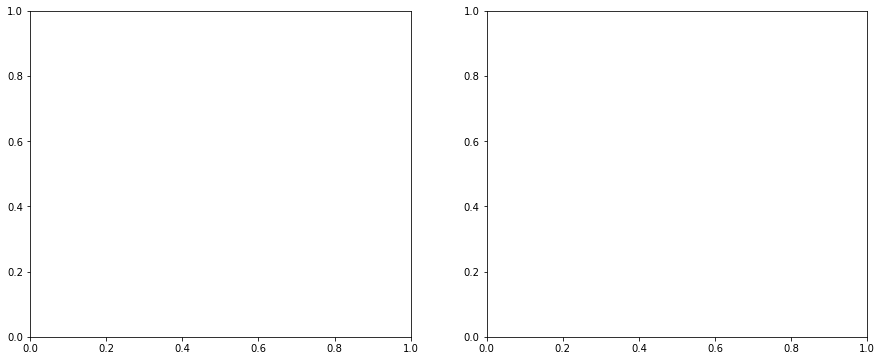

In [74]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.heatmap(df[df["Attrition"] == "Yes"][numerical_vars].corr(), cmap='Blues', annot=True, ax=ax[0])
sns.heatmap(df[df["Attrition"] == "No"][numerical_vars].corr(), cmap='Blues', annot=True, ax=ax[1], yticklabels = False)
ax[0].set_title("Attrition = Yes")
ax[1].set_title("Attrition = No")

## Dividing by department

In [76]:
attrition_yes = df[df['Attrition']== "Yes"]
attrition_no = df[df['Attrition']== "No"]

attrition_yes = attrition_yes["EducationField"].value_counts().to_frame().reset_index()
attrition_no = attrition_no["EducationField"].value_counts().to_frame().reset_index()

attrition_department = attrition_yes.merge(attrition_no, on = "index")
attrition_department.rename(columns={ "index":'EducationField', "EducationField_x":'Left', "EducationField_y":'Stayed'})
attrition_department
#attrition_department["Percent left"] = attrition_department["Left"].div(attrition_department["Stayed"], axis=0)
#attrition_department["Percent left"] = attrition_department["Left"] / attrition_department["Stayed"] * 100

,index,EducationField_x,EducationField_y
0,Life Sciences,89,517
1,Medical,63,401
2,Marketing,35,124
3,Technical Degree,32,100
4,Other,11,71
5,Human Resources,7,20


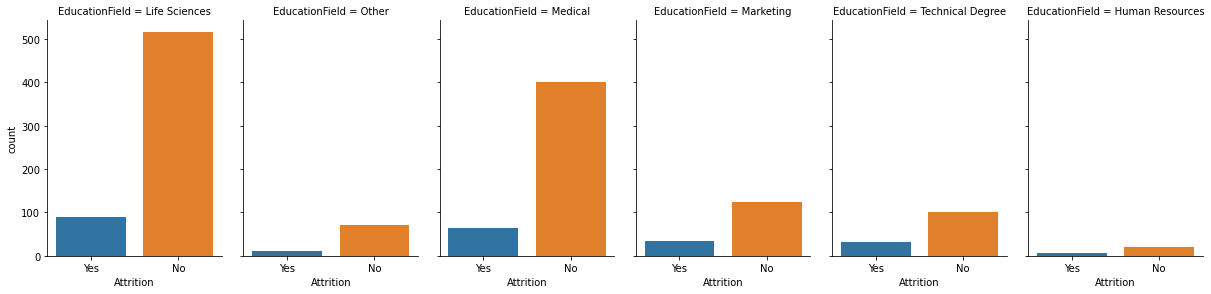

In [78]:
g = sns.catplot(x="Attrition", col="EducationField", hue=None,
                data=df, kind="count",
                height=4, aspect=.7)

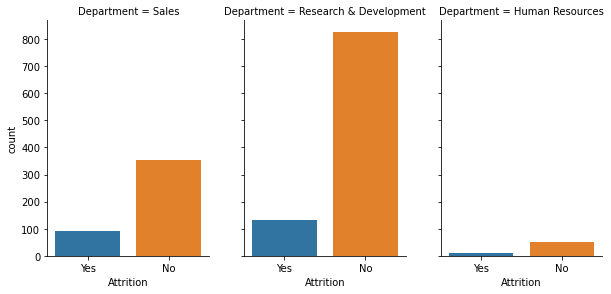

In [80]:
g = sns.catplot(x="Attrition", col="Department", hue=None,
                data=df, kind="count",
                height=4, aspect=.7)

# Limitations and Discussion

After examining the data, we see that _ % and _ % are medical and life sciences education field respectively, which make up the majority ( _ %) of our employees. Also highest percentage is in research and development. Thus more data is needed to be able to accurately predict employee turnout in different industries and education fields. 
There are internal and external causes of attrition, the scope of this analysis is limited to internal causes (based on data). 